In [1]:
from attitude_determination.star_mapping import StarMapping
from attitude_determination.hipparcos_catalog import HipparcosCatalog
import matplotlib.pyplot as plt

## Download and format the Hipparcos catalog from https://www.cosmos.esa.int/web/hipparcos/catalogues

The HipparcosCatalog class downloads the catalog and cleans it up, that is, keeps only the magnitude and position informations. The class takes care of computing the most correct right ascension and declination values based on the proper motion information. It considers the time difference between the system current time and the catalog year (1991.25 Julian years).

In [2]:
hipparcos_catalog = HipparcosCatalog()
catalog = hipparcos_catalog.generate_catalogue()

catalog.head()

A file called 'hipparcos_v1.dat' already exists in this directory
A file called 'hipparcos_v2.dat' already exists in this directory


,HIP,magnitude,right_ascension,declination
0,1,9.10,0.000015,0.019007
1,2,9.27,0.000095,-0.340319
2,3,6.61,0.000088,0.678222
3,4,8.06,0.000161,-0.905713
4,5,8.55,0.000174,-0.708449


## Generating star images
### Setting the parameters

In [3]:
# PARAMETERS
FOV = 8 # Field of view in degrees
RESOLUTION = (400, 400) # Image size in pixels
MAG_THRESHOLD = 6 # Stars with magnitude below 6 are no considered as visible
ROI = 10 # Radius around a star centroid. All pixel within this radius will be considered during the image construction.
BACKGROUND = 0 # DC value for the background color. 0 stands for pure black and 255 pure white.
CONSTANT = 25000 # A constant value used in the evaluation of the star pixel intensity. Lower values lead to dull stars.

In [4]:
# Gets the coordinates of Alnilam star 

catalog = catalog.set_index('HIP')
alnilam = catalog.loc[26311]
alnilam = alnilam[['right_ascension', 'declination']].values

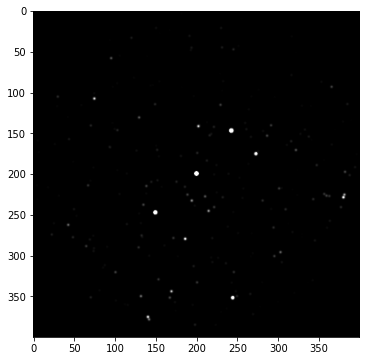

In [5]:
star_mapping = StarMapping(fov=FOV,
                           resolution=RESOLUTION,
                           pixel_size=None,
                           focal_length=None,
                           mag_threshold=MAG_THRESHOLD,
                           roi=ROI,
                           C=CONSTANT,
                           B=BACKGROUND)

orion_constellation = star_mapping.generate_image(catalog,
                                                  alnilam,
                                                  min_number_stars=10,
                                                  filename=None,
                                                  save_image=False)

plt.figure(0, figsize=(6, 6))
plt.imshow(orion_constellation, cmap='gray')
plt.show()             

### Generating images with different field of views

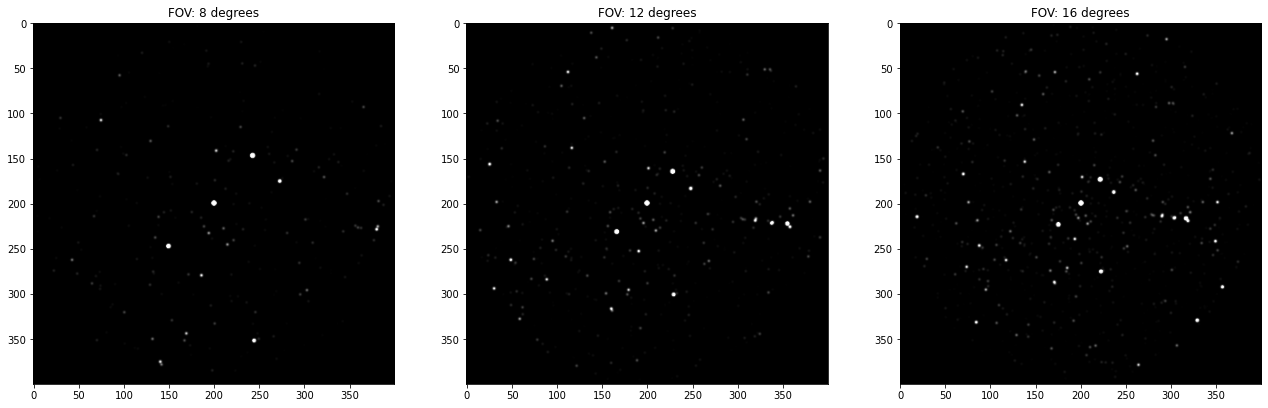

In [6]:
plt.figure(1, figsize=(22, 14))

for i, fov in enumerate([8, 12, 16]):
    star_mapping.fov = fov
    star_mapping.build_projection_matrix()

    orion_constellation = star_mapping.generate_image(catalog,
                                                      alnilam,
                                                      min_number_stars=10,
                                                      filename=None,
                                                      save_image=False)
    plt.subplot(1, 3, i+1)
    plt.imshow(orion_constellation, cmap='gray')
    plt.title(f"FOV: {fov} degrees")

plt.show()

### Noise crafting

It is possible to add some noise to the star images, such as:

        - False stars;
        - Position noise;
        - Magnitude noise;
        - Background noise;


Text(0.5, 1.0, 'Noisy')

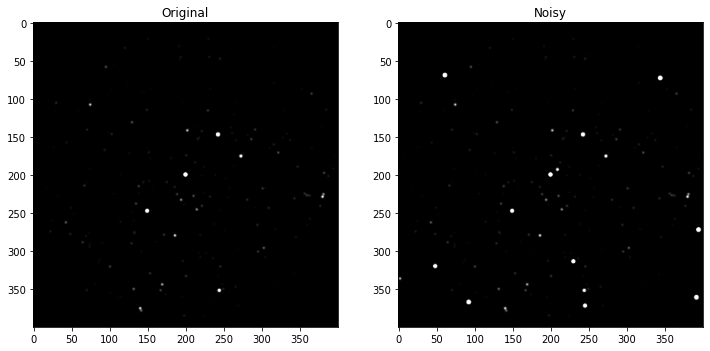

In [7]:
## False stars
star_mapping.fov = 8
star_mapping.build_projection_matrix()

orion_original = star_mapping.generate_image(catalog,
                                             alnilam,
                                             min_number_stars=10,
                                             filename=None,
                                             save_image=False)

noise = {"false_star": True,
         "num_false_stars": 10}

orion_noisy = star_mapping.generate_image(catalog,
                                          alnilam,
                                          min_number_stars=10,
                                          filename=None,
                                          save_image=False,
                                          **noise)
plt.figure(2, figsize=(12, 8))                                          
plt.subplot(121)
plt.imshow(orion_original, cmap='gray')
plt.title(f"Original")                                        
plt.subplot(122)
plt.imshow(orion_noisy, cmap='gray')
plt.title(f"Noisy")

Text(0.5, 1.0, 'Noisy')

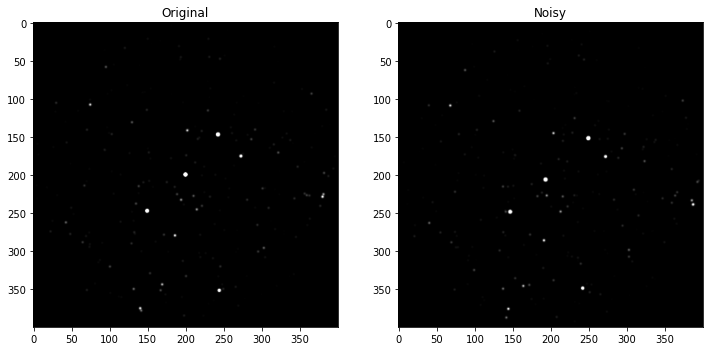

In [8]:
"""
    Position noise. The new position is calculated as following:
        centroid = centroid + additive_white_gaussian_noise(pos_stddev, pos_mean)
"""     
noise = {"pos_stddev": 5,
         "pos_mean": 3}

orion_noisy = star_mapping.generate_image(catalog,
                                          alnilam,
                                          min_number_stars=10,
                                          filename=None,
                                          save_image=False,
                                          **noise)
plt.figure(3, figsize=(12, 8))                                          
plt.subplot(121)
plt.imshow(orion_original, cmap='gray')
plt.title(f"Original")                                        
plt.subplot(122)
plt.imshow(orion_noisy, cmap='gray')
plt.title(f"Noisy")

Text(0.5, 1.0, 'Noisy')

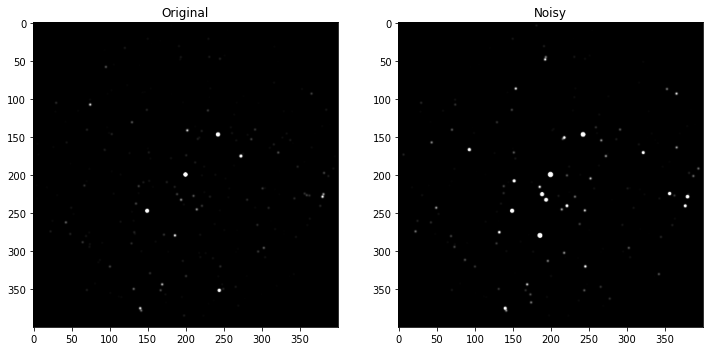

In [9]:
"""
    Magnitude noise. The new magnitude is calculated as following:
        magnitude = magnitude + additive_white_gaussian_noise(mag_stddev, mag_mean)
"""     
noise = {"mag_stddev": 2,
         "mag_mean": 0.5}

orion_noisy = star_mapping.generate_image(catalog,
                                          alnilam,
                                          min_number_stars=10,
                                          filename=None,
                                          save_image=False,
                                          **noise)
plt.figure(4, figsize=(12, 8))                                          
plt.subplot(121)
plt.imshow(orion_original, cmap='gray')
plt.title(f"Original")                                        
plt.subplot(122)
plt.imshow(orion_noisy, cmap='gray')
plt.title(f"Noisy")

Text(0.5, 1.0, 'Noisy')

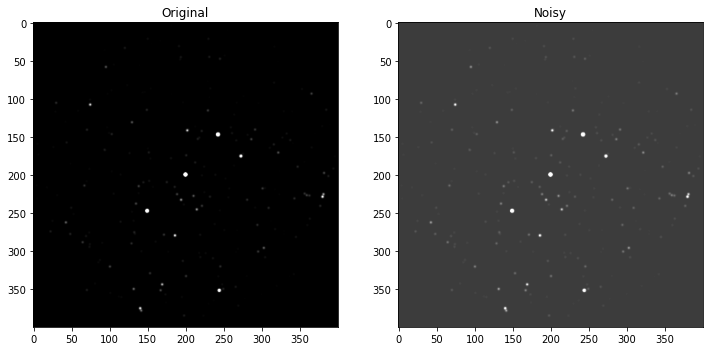

In [10]:
"""
    Background noise. The new magnitude is calculated as following:
        background = background + additive_white_gaussian_noise(background_stddev, background_mean)
"""     
noise = {"background_stddev": 5,
         "background_mean": 50}

orion_noisy = star_mapping.generate_image(catalog,
                                          alnilam,
                                          min_number_stars=10,
                                          filename=None,
                                          save_image=False,
                                          **noise)

plt.figure(5, figsize=(12, 8))                                          
plt.subplot(121)
plt.imshow(orion_original, cmap='gray')
plt.title(f"Original")                                        
plt.subplot(122)
plt.imshow(orion_noisy, cmap='gray', vmin=0, vmax=255)
plt.title(f"Noisy")

Text(0.5, 1.0, 'Noisy')

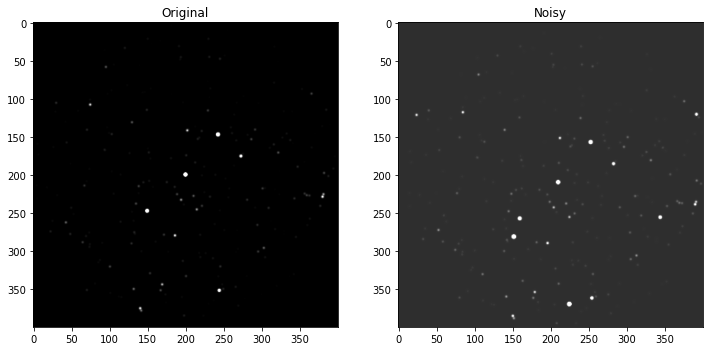

In [11]:
## Multiple types of noise can be added simultaneously

noise = {"background_stddev": 5,
         "background_mean": 50,
         "false_star": True,
         "num_false_stars": 5,
         "pos_mean": 10}

orion_noisy = star_mapping.generate_image(catalog,
                                          alnilam,
                                          min_number_stars=10,
                                          filename=None,
                                          save_image=False,
                                          **noise)

plt.figure(6, figsize=(12, 8))                                          
plt.subplot(121)
plt.imshow(orion_original, cmap='gray')
plt.title(f"Original")                                        
plt.subplot(122)
plt.imshow(orion_noisy, cmap='gray', vmin=0, vmax=255)
plt.title(f"Noisy")